In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
# functions

# select random points
def init_centroids(X, k):
    m, n = X.shape #shep = (300,2) to m=300 and n=2
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k) # idx[0]= idx[1]= idx[2]=
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids



# centroid function
def find_closest_centroids(X, centroids):
    m = X.shape[0] # m=300
    k = centroids.shape[0] #centroids = (3,2) k=3
    idx = np.zeros(m) # idx list of m zeros
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            #classify the point by ramked it as 0, 1 or 2 it depends on which centerpoint it is close
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx


# centroid maker
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n)) # (3,2)
    
    for i in range(k): # 0 1 2
        indices = np.where(idx == i) # indices is a list where i = 0, 1, or 2
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids


# k means function
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids# we need to compress the image

(128, 128, 3)


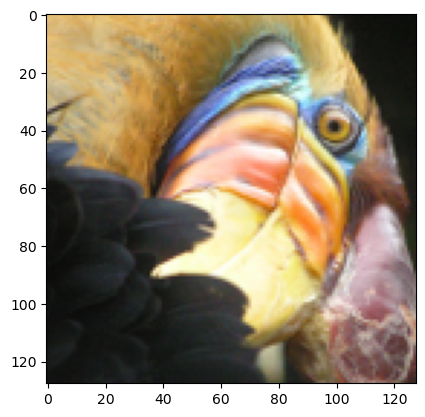

In [3]:
# we need to compress the image

image_data = loadmat('//home//khalid//pythonfiles//UN//bird_small.mat')

# print(image_data)

A = image_data['A']

print(A.shape) # (128, 128, 3) = 16000 features
plt.imshow(A)

In [4]:
# normalize value ranges
A = A / 255. # all colors are from 0 to 255

In [5]:
# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print(X.shape)

(16384, 3)


In [6]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16) #choose 16 center points
print(initial_centroids)

[[0.7254902  0.57254902 0.6       ]
 [0.99215686 0.96470588 0.90980392]
 [0.99607843 0.88235294 0.76470588]
 [0.20784314 0.20392157 0.20392157]
 [0.50588235 0.40784314 0.28627451]
 [0.09411765 0.10980392 0.09803922]
 [0.28627451 0.28627451 0.44313725]
 [0.18431373 0.20392157 0.20392157]
 [0.09019608 0.09019608 0.08627451]
 [0.09803922 0.10588235 0.09019608]
 [0.67058824 0.50980392 0.24313725]
 [0.51372549 0.43921569 0.44313725]
 [0.91372549 0.77647059 0.4627451 ]
 [0.77254902 0.59215686 0.30196078]
 [0.05098039 0.0627451  0.04313725]
 [0.19607843 0.18823529 0.21568627]]


In [7]:
# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10) # 10 mo7awalat (deplacement & choose new centers)


In [8]:
# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

In [9]:
# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

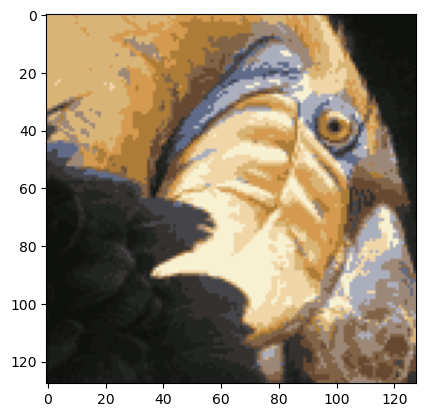

In [10]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)